# Lab | Customer Analysis Round 5

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.


### 1. Get the data

We are using the `marketing_customer_analysis.csv` file.


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [95]:
data = pd.read_csv('marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large



### 2. Dealing with the data

Already done in the round 2.



### 3. Explore the data

Some datasets have values that are missing, invalid, or otherwise difficult for an algorithm to process. If data is missing, the algorithm can’t use it. If data is invalid, the algorithm produces less accurate or even misleading outcomes. Some datasets are relatively clean but need to be shaped (e.g., aggregated or pivoted) and many datasets are just lacking useful business context (e.g., poorly defined ID values), hence the need for feature enrichment. Good data preparation produces clean and well-curated data which leads to more practical, accurate model outcomes.


   **3.1.- Determine the problems**
    
   **3.2.- Data cleaning** Cleaning the data is very important as the model learning from that data only, so if we feed inconsistent, appropriate data to model it will return garbage only, so it is required to make sure that the data does not contains any unseen problem.
     
       - Feature and Target Variables
       - Data Types
       - Missing data, check null values
       - Outliers
       - Duplicate data
        
   **3.3.- Feature selection** (Which variables are important to answer our questions?)
    
   **3.4.- Data transformation**

In [96]:
#3.1 Determine the problems

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [97]:
#We can see that there is a lot of categorical variables so there is not that much variables that we can use for the linear regression analyse.
#Some of the categorical variables can be really usefull to understand better the link between variables 

In [98]:
#3.2 Data cleaning

In [99]:
#checking for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [100]:
#checking for null values
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [101]:
#checking for duplicates
data = data.drop_duplicates()
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [102]:
#Dataframe that contains only numerical values
numerical = data.select_dtypes(include=['float', 'int'])
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


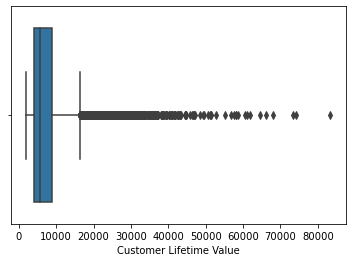

In [103]:
#checking for each column the outliers and removing them
sns.boxplot(x=numerical['Customer Lifetime Value'])
plt.show()

In [104]:
iqr = np.percentile(numerical['Customer Lifetime Value'],75) - np.percentile(numerical['Customer Lifetime Value'],25)
iqr

4967.915247000001

In [105]:
upper_limit = np.percentile(numerical['Customer Lifetime Value'],75) + 1.5*iqr
lower_limit = np.percentile(numerical['Customer Lifetime Value'],25) - 1.5*iqr
upper_limit, lower_limit

(16414.039911750002, -3457.6210762500014)

In [106]:
numerical = numerical[(numerical['Customer Lifetime Value']>lower_limit) & (numerical['Customer Lifetime Value']<upper_limit)]
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9128,4100.398533,47761,104,16,58,0,1,541.282007
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [107]:
upper_limit = np.percentile(numerical['Customer Lifetime Value'],75) + 1.5*iqr
lower_limit = np.percentile(numerical['Customer Lifetime Value'],25) - 1.5*iqr
upper_limit, lower_limit

(15614.489923500001, -3705.1212455000014)

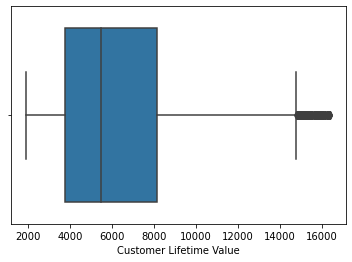

In [108]:
sns.boxplot(x=numerical['Customer Lifetime Value'])
plt.show()

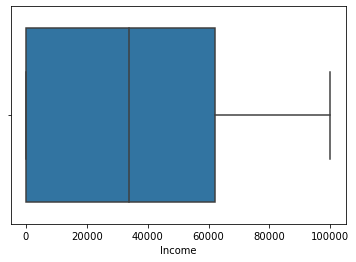

In [109]:
sns.boxplot(x=numerical['Income'])
plt.show()

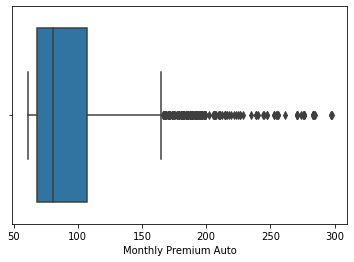

In [110]:
sns.boxplot(x=numerical['Monthly Premium Auto'])
plt.show()

In [111]:
iqr = np.percentile(numerical['Monthly Premium Auto'],75) - np.percentile(numerical['Monthly Premium Auto'],25)
iqr

39.0

In [112]:
upper_limit = np.percentile(numerical['Monthly Premium Auto'],75) + 1.5*iqr
lower_limit = np.percentile(numerical['Monthly Premium Auto'],25) - 1.5*iqr
upper_limit, lower_limit

(165.5, 9.5)

In [113]:
numerical = numerical[(numerical['Monthly Premium Auto']>lower_limit) & (numerical['Monthly Premium Auto']<upper_limit)]
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9128,4100.398533,47761,104,16,58,0,1,541.282007
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


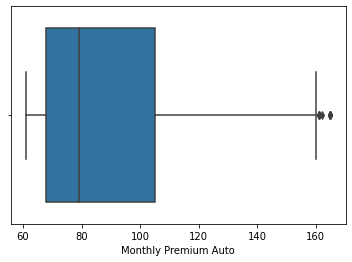

In [114]:
sns.boxplot(x=numerical['Monthly Premium Auto'])
plt.show()

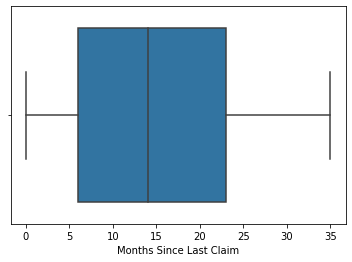

In [115]:
sns.boxplot(x=numerical['Months Since Last Claim'])
plt.show()

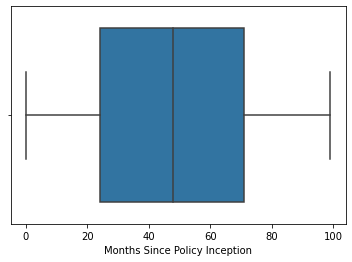

In [116]:
sns.boxplot(x=numerical['Months Since Policy Inception'])
plt.show()

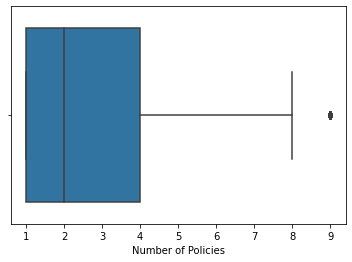

In [117]:
sns.boxplot(x=numerical['Number of Policies'])
plt.show()

In [118]:
iqr = np.percentile(numerical['Number of Policies'],75) - np.percentile(numerical['Number of Policies'],25)
iqr

3.0

In [119]:
upper_limit = np.percentile(numerical['Number of Policies'],75) + 1.5*iqr
lower_limit = np.percentile(numerical['Number of Policies'],25) - 1.5*iqr
upper_limit, lower_limit

(8.5, -3.5)

In [120]:
numerical = numerical[(numerical['Number of Policies']>lower_limit) & (numerical['Number of Policies']<upper_limit)]
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9128,4100.398533,47761,104,16,58,0,1,541.282007
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


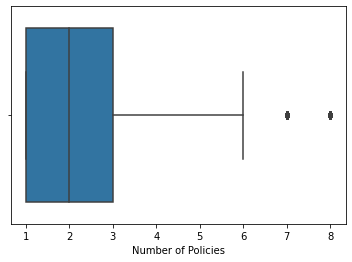

In [121]:
sns.boxplot(x=numerical['Number of Policies'])
plt.show()

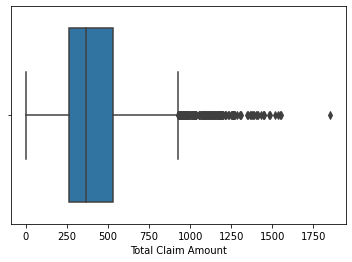

In [122]:
sns.boxplot(x=numerical['Total Claim Amount'])
plt.show()

In [123]:
iqr = np.percentile(numerical['Total Claim Amount'],75) - np.percentile(numerical['Total Claim Amount'],25)
iqr

266.54167599999994

In [124]:
upper_limit = np.percentile(numerical['Total Claim Amount'],75) + 1.5*iqr
lower_limit = np.percentile(numerical['Total Claim Amount'],25) - 1.5*iqr
upper_limit, lower_limit

(927.2340929999998, -138.9326109999999)

In [125]:
numerical = numerical[(numerical['Total Claim Amount']>lower_limit) & (numerical['Total Claim Amount']<upper_limit)]
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042
...,...,...,...,...,...,...,...,...
9128,4100.398533,47761,104,16,58,0,1,541.282007
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


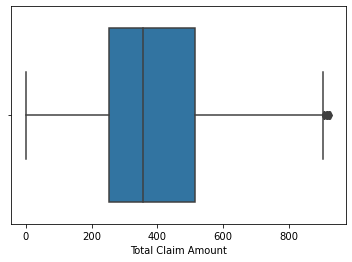

In [126]:
sns.boxplot(x=numerical['Total Claim Amount'])
plt.show()

In [127]:
#3.3 Feature selection
#I decided here to use only a few variables because there are some who are not intersting to add in our analyse.
#I choose : Customer Lifetime Value, Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception and Total Claim Amount

In [128]:
#3.4 Data transformation --> Dropping useless columns
numerical = numerical.drop(['Number of Open Complaints'], axis=1)

In [129]:
numerical = numerical.drop(['Number of Policies'], axis=1)

In [130]:
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
5,8256.297800,62902,69,14,94,159.383042
...,...,...,...,...,...,...
9128,4100.398533,47761,104,16,58,541.282007
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


### 4. Processing Data

(_Further processing..._)

- X-y split.
- Normalize (numerical).

In [131]:
#X-y split
#Using 'total claim amount' as y (target) 
X = numerical.drop(['Total Claim Amount'], axis=1)
y = numerical['Total Claim Amount']


X = sm.add_constant(X)

model = sm.OLS(y,X).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     760.4
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:17:35   Log-Likelihood:                -48201.
No. Observations:                7399   AIC:                         9.641e+04
Df Residuals:                    7393   BIC:                         9.645e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

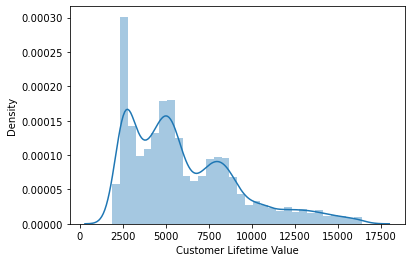

In [134]:
sns.distplot(numerical['Customer Lifetime Value'])
plt.show()

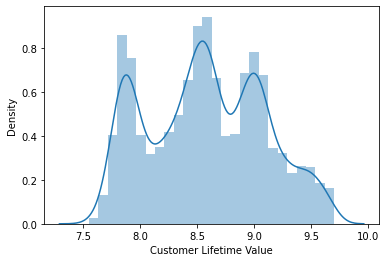

In [132]:
numerical1 = numerical.copy()

log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN

numerical1['Customer Lifetime Value'] = numerical1['Customer Lifetime Value'].apply(log_lmbda)

numerical1['Customer Lifetime Value'] = numerical1['Customer Lifetime Value'].fillna(np.mean(numerical1['Customer Lifetime Value']))

sns.distplot(numerical1['Customer Lifetime Value'])
plt.show()

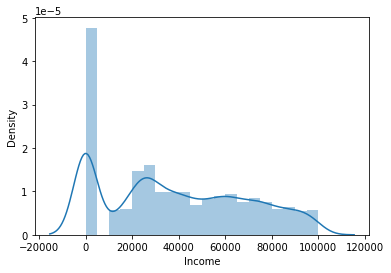

In [136]:
sns.distplot(numerical['Income'])
plt.show()

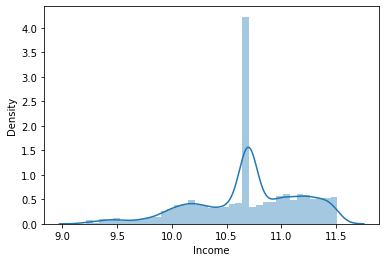

In [139]:
numerical2 = numerical.copy()

log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN

numerical2['Income'] = numerical2['Income'].apply(log_lmbda)

numerical2['Income'] = numerical2['Income'].fillna(np.mean(numerical2['Income']))

sns.distplot(numerical2['Income'])
plt.show()

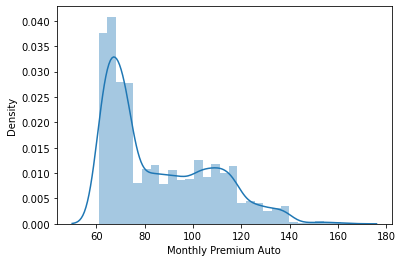

In [137]:
sns.distplot(numerical['Monthly Premium Auto'])
plt.show()

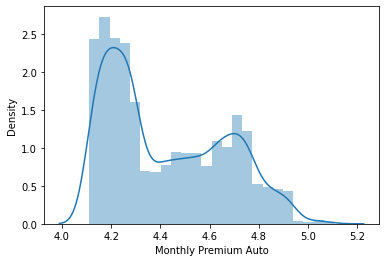

In [140]:
numerical3 = numerical.copy()

log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN

numerical3['Monthly Premium Auto'] = numerical3['Monthly Premium Auto'].apply(log_lmbda)

numerical3['Monthly Premium Auto'] = numerical3['Monthly Premium Auto'].fillna(np.mean(numerical3['Monthly Premium Auto']))

sns.distplot(numerical3['Monthly Premium Auto'])
plt.show()

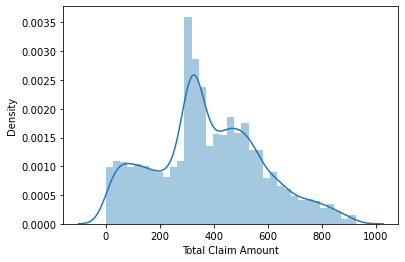

In [141]:
sns.distplot(numerical['Total Claim Amount'])
plt.show()

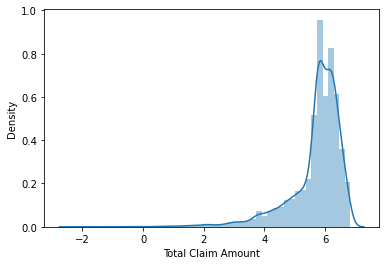

In [142]:
numerical4 = numerical.copy()

log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN

numerical4['Total Claim Amount'] = numerical4['Total Claim Amount'].apply(log_lmbda)

numerical4['Total Claim Amount'] = numerical4['Total Claim Amount'].fillna(np.mean(numerical4['Total Claim Amount']))

sns.distplot(numerical4['Total Claim Amount'])
plt.show()